# K Means Clustering


## Unsupervised Learning

To find patterns in data.
- finding clusters of customers based on their purchases (clustering)
- searching for co-relations between those purchases (beer and diapers)
- using the pattern to express the data in a compressed form (data compression, e.g. PCA )

**Clustering**  is  a  technique  to  divide  data  into  different  groups,  where  the  records  in
each group are similar to one another. A goal of clustering is to identify significant
and  meaningful  groups  of  data.

## Supervised Learning
To find patterns for a prediction task.
- to predict labels (classification)
    - using measurements of tumors to classify them as benign or cancerous
- to predict values (prediction)

## Kmeans

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. **Unsupervised learning** means that there is no outcome to be predicted, and the algorithm just *tries to find patterns* in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:
Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the distance/squared distance between the data points and their respective cluster centroids.

### Key Terms for K-Means Clustering

**Cluster**

- A group of records that are similar.

**Cluster mean**

- The vector of variable means for the records in a cluster (centers/centroids).

**K**

- The number of clusters. 

**MY NOTES**: stuff in clusters closer together, space between clusters farther away  

without ground truth/labels:  
Beer and diapers often purchased together - correlation Mining.   
PCA: reduce dimension of dataset, only keep some features


Mean: of cluster => center of cluster.  
Take average of all samples in cluster, get the mean. 

K: how many clusters we are going to try to cluster the samples. 


### Algorithm (a more accepted version)
Step 1 - Pick K random points as cluster centers called centroids.

Step 2 - Assign each sample to nearest cluster by calculating its distance to each centroid.

Step 3 - Find new cluster center by taking the average of the assigned points.  
        Take average of all points- this value maybe close or far from centroid.

Step 4 - Repeat Step 2 and 3 until none of the cluster assignments change.  
        
    Step 2 and 3 iterative.

**Initial iteration with random centers**
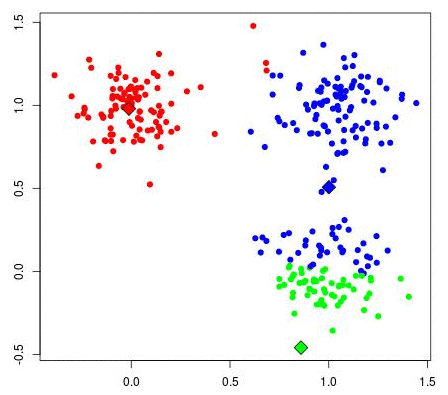

**updated centers after the initial iteration**
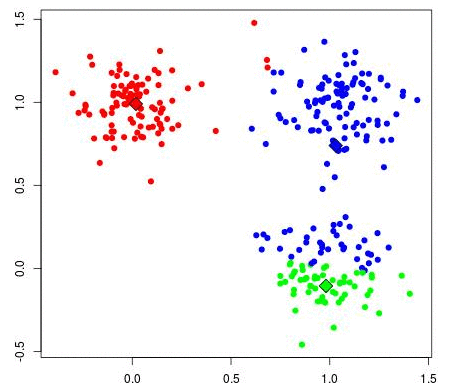

In [ ]:
#Blue centriod drug up a little bit
# reassign centriods to neartest one 

**second iteration**
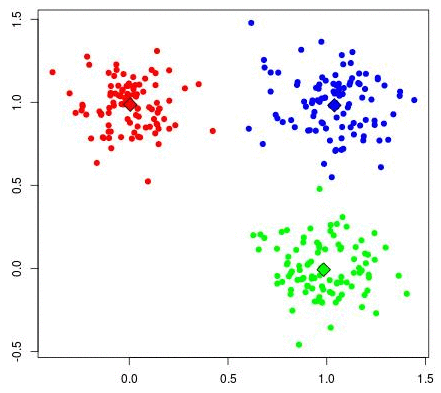

In [1]:
#after a few rounds, results stay stable or CONVERGE
#final three centroids will be the center of the 

#want to miminimize sum of squares aka within cluster SS

#Assign each sample to NEAREST, aka DISTANCE. Must normalize/standardize data. 

K-means divides the data into K clusters by minimizing the **sum of the squared distances**  of  each  record  to  the  mean  of  its  assigned  cluster.  The  is  referred  to  as  the
within-cluster sum of squares or **within-cluster SS**. K-means does not ensure the clusters will have the same size, but finds the clusters that are the best separated.

### Normalization
It is typical to normalize (standardize) continuous variables by subtracting  the  mean  and  dividing  by  the  standard  deviation.  Otherwise, variables with large scale will dominate the clustering process. (if the algorithm is using distances, it is always a good idea to standardize the data).

We will talk more about the technical details about Kmeans, now let's see some code!

## Import Libraries

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Create some Data

In [3]:
from sklearn.datasets import make_blobs

In [4]:
# Create Data
# create 200 samples with 2-D features
# there are 4 centers(centroids), cluster std is 1.8
# random seed is 101
data = make_blobs(n_samples=200, n_features=2, 
                           centers=4, cluster_std=1.8,random_state=101)
# the generated data is a tuple
# the first object is an array of features also in arrays
# the second object is an array of cluster labels, in this case 0 to 3
data

(array([[-6.42884095e+00,  1.01411174e+01],
        [ 5.86867888e+00,  5.20110356e+00],
        [-3.76109375e-01,  3.26427943e+00],
        [ 2.16679181e+00,  9.56300522e+00],
        [ 5.09508570e+00,  7.20752718e+00],
        [-1.08788882e+01, -6.11318040e+00],
        [ 2.03405554e+00,  9.76664755e+00],
        [-1.71798771e+00,  1.41401140e+00],
        [ 1.16911341e+00,  8.24556988e+00],
        [-1.35185444e+00,  3.13245345e+00],
        [-6.18548214e+00,  9.67406555e+00],
        [-1.19856602e+00,  2.50408937e+00],
        [ 2.90296863e+00,  7.91251003e+00],
        [ 2.39250023e+00,  5.38173971e+00],
        [-5.27545147e+00,  9.63836659e+00],
        [-5.66814687e-01,  5.60262755e-02],
        [ 5.97336628e+00,  5.87172022e+00],
        [-2.31355268e+00,  5.23980092e-01],
        [-1.01344756e+01, -3.43130837e+00],
        [-4.54082629e+00,  1.13920174e+01],
        [-1.04155833e+01, -5.67545836e+00],
        [ 6.64796693e-01,  9.42304718e-02],
        [ 2.11460477e+00,  3.559

## Visualize Data

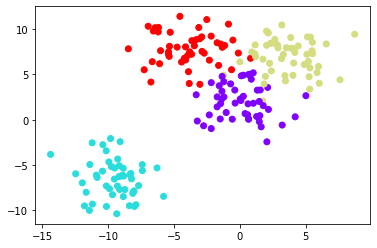

In [5]:
# data[0] is all the features for the randomly generated samples
# data[0][:,0] produces all the x values for the samples
# data[0][:,1] produces all the y values
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

## Creating the Clusters

In [6]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(n_clusters=4) #specify number of cluster to be four
#cheating in this case bc we know there are four

In [9]:
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
# get the centers of clusters
kmeans.cluster_centers_ #x,y coordinates of centroids

array([[-9.46941837, -6.56081545],
       [-0.0123077 ,  2.13407664],
       [-4.13591321,  7.95389851],
       [ 3.71749226,  7.01388735]])

In [11]:
# get the cluster labels
kmeans.labels_ #

array([2, 3, 1, 3, 3, 0, 3, 1, 3, 1, 2, 1, 3, 3, 2, 1, 3, 1, 0, 2, 0, 1,
       1, 0, 2, 0, 0, 1, 3, 3, 2, 0, 3, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 2,
       1, 3, 2, 1, 0, 1, 1, 2, 3, 1, 0, 2, 1, 1, 2, 3, 0, 3, 0, 2, 3, 1,
       0, 3, 3, 0, 3, 1, 0, 1, 0, 3, 3, 1, 2, 1, 1, 0, 3, 0, 1, 1, 1, 2,
       1, 0, 0, 0, 0, 1, 1, 0, 3, 2, 0, 3, 1, 0, 1, 1, 3, 1, 0, 3, 0, 0,
       3, 2, 2, 3, 0, 3, 2, 2, 3, 2, 1, 2, 1, 2, 1, 3, 2, 1, 0, 2, 2, 2,
       1, 0, 0, 2, 3, 2, 3, 1, 0, 3, 0, 2, 2, 3, 1, 0, 2, 2, 2, 2, 1, 3,
       1, 2, 3, 3, 3, 1, 3, 1, 1, 2, 0, 2, 1, 3, 2, 1, 3, 1, 2, 3, 1, 2,
       3, 3, 0, 3, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 3, 3, 2, 0, 1, 3, 3,
       0, 1])

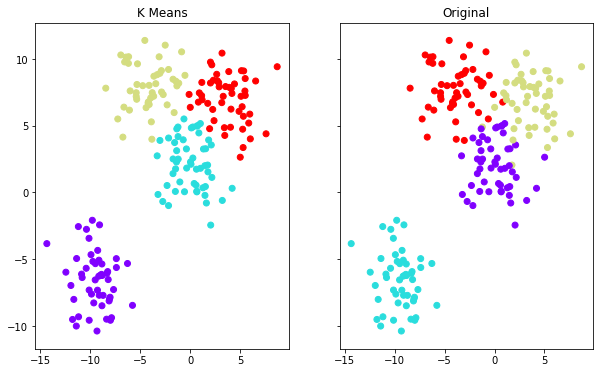

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

You should note, the colors are meaningless in reference between the two plots.

When you zoom in, you will see some of the samples are clustered differently from the original cluster labels.

Did we do a good job?  
Colors meaningless here, Centroids and clustering did very good. Got pretty close clustering.   
Centroids are at right locations

## How about we cluster the data into two clusters?

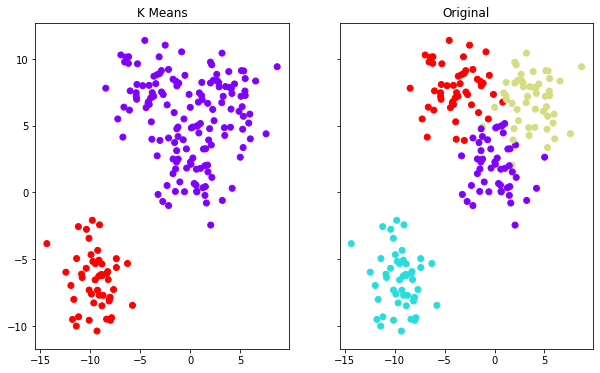

In [13]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data[0])
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

## Exercise: 

In [14]:
# Please see the problem description below 
points = [[ 0.06544649, -0.76866376],
       [-1.52901547, -0.42953079],
       [ 1.70993371,  0.69885253],
       [ 1.16779145,  1.01262638],
       [-1.80110088, -0.31861296],
       [-1.63567888, -0.02859535],
       [ 1.21990375,  0.74643463],
       [-0.26175155, -0.62492939],
       [-1.61925804, -0.47983949],
       [-1.84329582, -0.16694431],
       [ 1.35999602,  0.94995827],
       [ 0.42291856, -0.7349534 ],
       [-1.68576139,  0.10686728],
       [ 0.90629995,  1.09105162],
       [-1.56478322, -0.84675394],
       [-0.0257849 , -1.18672539],
       [ 0.83027324,  1.14504612],
       [ 1.22450432,  1.35066759],
       [-0.15394596, -0.71704301],
       [ 0.86358809,  1.06824613],
       [-1.43386366, -0.2381297 ],
       [ 0.03844769, -0.74635022],
       [-1.58567922,  0.08499354],
       [ 0.6359888 , -0.58477698],
       [ 0.24417242, -0.53172465],
       [-2.19680359,  0.49473677],
       [ 1.0323503 , -0.55688   ],
       [-0.28858067, -0.39972528],
       [ 0.20597008, -0.80171536],
       [-1.2107308 , -0.34924109],
       [ 1.33423684,  0.7721489 ],
       [ 1.19480152,  1.04788556],
       [ 0.9917477 ,  0.89202008],
       [-1.8356219 , -0.04839732],
       [ 0.08415721, -0.71564326],
       [-1.48970175, -0.19299604],
       [ 0.38782418, -0.82060119],
       [-0.01448044, -0.9779841 ],
       [-2.0521341 , -0.02129125],
       [ 0.10331194, -0.82162781],
       [-0.44189315, -0.65710974],
       [ 1.10390926,  1.02481182],
       [-1.59227759, -0.17374038],
       [-1.47344152, -0.02202853],
       [-1.35514704,  0.22971067],
       [ 0.0412337 , -1.23776622],
       [ 0.4761517 , -1.13672124],
       [ 1.04335676,  0.82345905],
       [-0.07961882, -0.85677394],
       [ 0.87065059,  1.08052841],
       [ 1.40267313,  1.07525119],
       [ 0.80111157,  1.28342825],
       [-0.16527516, -1.23583804],
       [-0.33779221, -0.59194323],
       [ 0.80610749, -0.73752159],
       [-1.43590032, -0.56384446],
       [ 0.54868895, -0.95143829],
       [ 0.46803131, -0.74973907],
       [-1.5137129 , -0.83914323],
       [ 0.9138436 ,  1.51126532],
       [-1.97233903, -0.41155375],
       [ 0.5213406 , -0.88654894],
       [ 0.62759494, -1.18590477],
       [ 0.94163014,  1.35399335],
       [ 0.56994768,  1.07036606],
       [-1.87663382,  0.14745773],
       [ 0.90612186,  0.91084011],
       [-1.37481454,  0.28428395],
       [-1.80564029, -0.96710574],
       [ 0.34307757, -0.79999275],
       [ 0.70380566,  1.00025804],
       [-1.68489862, -0.30564595],
       [ 1.31473221,  0.98614978],
       [ 0.26151216, -0.26069251],
       [ 0.9193121 ,  0.82371485],
       [-1.21795929, -0.20219674],
       [-0.17722723, -1.02665245],
       [ 0.64824862, -0.66822881],
       [ 0.41206786, -0.28783784],
       [ 1.01568202,  1.13481667],
       [ 0.67900254, -0.91489502],
       [-1.05182747, -0.01062376],
       [ 0.61306599,  1.78210384],
       [-1.50219748, -0.52308922],
       [-1.72717293, -0.46173916],
       [-1.60995631, -0.1821007 ],
       [-1.09111021, -0.0781398 ],
       [-0.01046978, -0.80913034],
       [ 0.32782303, -0.80734754],
       [ 1.22038503,  1.1959793 ],
       [-1.33328681, -0.30001937],
       [ 0.87959517,  1.11566491],
       [-1.14829098, -0.30400762],
       [-0.58019755, -1.19996018],
       [-0.01161159, -0.78468854],
       [ 0.17359724, -0.63398145],
       [ 1.32738556,  0.67759969],
       [-1.93467327,  0.30572472],
       [-1.57761893, -0.27726365],
       [ 0.47639   ,  1.21422648],
       [-1.65237509, -0.6803981 ],
       [-0.12609976, -1.04327457],
       [-1.89607082, -0.70085502],
       [ 0.57466899,  0.74878369],
       [-0.16660312, -0.83110295],
       [ 0.8013355 ,  1.22244435],
       [ 1.18455426,  1.4346467 ],
       [ 1.08864428,  0.64667112],
       [-1.61158505,  0.22805725],
       [-1.57512205, -0.09612576],
       [ 0.0721357 , -0.69640328],
       [-1.40054298,  0.16390598],
       [ 1.09607713,  1.16804691],
       [-2.54346204, -0.23089822],
       [-1.34544875,  0.25151126],
       [-1.35478629, -0.19103317],
       [ 0.18368113, -1.15827725],
       [-1.31368677, -0.376357  ],
       [ 0.09990129,  1.22500491],
       [ 1.17225574,  1.30835143],
       [ 0.0865397 , -0.79714371],
       [-0.21053923, -1.13421511],
       [ 0.26496024, -0.94760742],
       [-0.2557591 , -1.06266022],
       [-0.26039757, -0.74774225],
       [-1.91787359,  0.16434571],
       [ 0.93021139,  0.49436331],
       [ 0.44770467, -0.72877918],
       [-1.63802869, -0.58925528],
       [-1.95712763, -0.10125137],
       [ 0.9270337 ,  0.88251423],
       [ 1.25660093,  0.60828073],
       [-1.72818632,  0.08416887],
       [ 0.3499788 , -0.30490298],
       [-1.51696082, -0.50913109],
       [ 0.18763605, -0.55424924],
       [ 0.89609809,  0.83551508],
       [-1.54968857, -0.17114782],
       [ 1.2157457 ,  1.23317728],
       [ 0.20307745, -1.03784906],
       [ 0.84589086,  1.03615273],
       [ 0.53237919,  1.47362884],
       [-0.05319044, -1.36150553],
       [ 1.38819743,  1.11729915],
       [ 1.00696304,  1.0367721 ],
       [ 0.56681869, -1.09637176],
       [ 0.86888296,  1.05248874],
       [-1.16286609, -0.55875245],
       [ 0.27717768, -0.83844015],
       [ 0.16563267, -0.80306607],
       [ 0.38263303, -0.42683241],
       [ 1.14519807,  0.89659026],
       [ 0.81455857,  0.67533667],
       [-1.8603152 , -0.09537561],
       [ 0.965641  ,  0.90295579],
       [-1.49897451, -0.33254044],
       [-0.1335489 , -0.80727582],
       [ 0.12541527, -1.13354906],
       [ 1.06062436,  1.28816358],
       [-1.49154578, -0.2024641 ],
       [ 1.16189032,  1.28819877],
       [ 0.54282033,  0.75203524],
       [ 0.89221065,  0.99211624],
       [-1.49932011, -0.32430667],
       [ 0.3166647 , -1.34482915],
       [ 0.13972469, -1.22097448],
       [-1.5499724 , -0.10782584],
       [ 1.23846858,  1.37668804],
       [ 1.25558954,  0.72026098],
       [ 0.25558689, -1.28529763],
       [ 0.45168933, -0.55952093],
       [ 1.06202057,  1.03404604],
       [ 0.67451908, -0.54970299],
       [ 0.22759676, -1.02729468],
       [-1.45835281, -0.04951074],
       [ 0.23273501, -0.70849262],
       [ 1.59679589,  1.11395076],
       [ 0.80476105,  0.544627  ],
       [ 1.15492521,  1.04352191],
       [ 0.59632776, -1.19142897],
       [ 0.02839068, -0.43829366],
       [ 1.13451584,  0.5632633 ],
       [ 0.21576204, -1.04445753],
       [ 1.41048987,  1.02830719],
       [ 1.12289302,  0.58029441],
       [ 0.25200688, -0.82588436],
       [-1.28566081, -0.07390909],
       [ 1.52849815,  1.11822469],
       [-0.23907858, -0.70541972],
       [-0.25792784, -0.81825035],
       [ 0.59367818, -0.45239915],
       [ 0.07931909, -0.29233213],
       [-1.27256815,  0.11630577],
       [ 0.66930129,  1.00731481],
       [ 0.34791546, -1.20822877],
       [-2.11283993, -0.66897935],
       [-1.6293824 , -0.32718222],
       [-1.53819139, -0.01501972],
       [-0.11988545, -0.6036339 ],
       [-1.54418956, -0.30389844],
       [ 0.30026614, -0.77723173],
       [ 0.00935449, -0.53888192],
       [-1.33424393, -0.11560431],
       [ 0.47504489,  0.78421384],
       [ 0.59313264,  1.232239  ],
       [ 0.41370369, -1.35205857],
       [ 0.55840948,  0.78831053],
       [ 0.49855018, -0.789949  ],
       [ 0.35675809, -0.81038693],
       [-1.86197825, -0.59071305],
       [-1.61977671, -0.16076687],
       [ 0.80779295, -0.73311294],
       [ 1.62745775,  0.62787163],
       [-1.56993593, -0.08467567],
       [ 1.02558561,  0.89383302],
       [ 0.24293461, -0.6088253 ],
       [ 1.23130242,  1.00262186],
       [-1.9651013 , -0.15886289],
       [ 0.42795032, -0.70384432],
       [-1.58306818, -0.19431923],
       [-1.57195922,  0.01413469],
       [-0.98145373,  0.06132285],
       [-1.48637844, -0.5746531 ],
       [ 0.98745828,  0.69188053],
       [ 1.28619721,  1.28128821],
       [ 0.85850596,  0.95541481],
       [ 0.19028286, -0.82112942],
       [ 0.26561046, -0.04255239],
       [-1.61897897,  0.00862372],
       [ 0.24070183, -0.52664209],
       [ 1.15220993,  0.43916694],
       [-1.21967812, -0.2580313 ],
       [ 0.33412533, -0.86117761],
       [ 0.17131003, -0.75638965],
       [-1.19828397, -0.73744665],
       [-0.12245932, -0.45648879],
       [ 1.51200698,  0.88825741],
       [ 1.10338866,  0.92347479],
       [ 1.30972095,  0.59066989],
       [ 0.19964876,  1.14855889],
       [ 0.81460515,  0.84538972],
       [-1.6422739 , -0.42296206],
       [ 0.01224351, -0.21247816],
       [ 0.33709102, -0.74618065],
       [ 0.47301054,  0.72712075],
       [ 0.34706626,  1.23033757],
       [-0.00393279, -0.97209694],
       [-1.64303119,  0.05276337],
       [ 1.44649625,  1.14217033],
       [-1.93030087, -0.40026146],
       [-2.37296135, -0.72633645],
       [ 0.45860122, -1.06048953],
       [ 0.4896361 , -1.18928313],
       [-1.02335902, -0.17520578],
       [-1.32761107, -0.93963549],
       [-1.50987909, -0.09473658],
       [ 0.02723057, -0.79870549],
       [ 1.0169412 ,  1.26461701],
       [ 0.47733527, -0.9898471 ],
       [-1.27784224, -0.547416  ],
       [ 0.49898802, -0.6237259 ],
       [ 1.06004731,  0.86870008],
       [ 1.00207501,  1.38293512],
       [ 1.31161394,  0.62833956],
       [ 1.13428443,  1.18346542],
       [ 1.27671346,  0.96632878],
       [-0.63342885, -0.97768251],
       [ 0.12698779, -0.93142317],
       [-1.34510812, -0.23754226],
       [-0.53162278, -1.25153594],
       [ 0.21959934, -0.90269938],
       [-1.78997479, -0.12115748],
       [ 1.23197473, -0.07453764],
       [ 1.4163536 ,  1.21551752],
       [-1.90280976, -0.1638976 ],
       [-0.22440081, -0.75454248],
       [ 0.59559412,  0.92414553],
       [ 1.21930773,  1.08175284],
       [-1.99427535, -0.37587799],
       [-1.27818474, -0.52454551],
       [ 0.62352689, -1.01430108],
       [ 0.14024251, -0.428266  ],
       [-0.16145713, -1.16359731],
       [-1.74795865, -0.06033101],
       [-1.16659791,  0.0902393 ],
       [ 0.41110408, -0.8084249 ],
       [ 1.14757168,  0.77804528],
       [-1.65590748, -0.40105446],
       [-1.15306865,  0.00858699],
       [ 0.60892121,  0.68974833],
       [-0.08434138, -0.97615256],
       [ 0.19170053, -0.42331438],
       [ 0.29663162, -1.13357399],
       [-1.36893628, -0.25052124],
       [-0.08037807, -0.56784155],
       [ 0.35695011, -1.15064408],
       [ 0.02482179, -0.63594828],
       [-1.49075558, -0.2482507 ],
       [-1.408588  ,  0.25635431],
       [-1.98274626, -0.54584475]]

In [15]:
# change the points from python list to ndarray in numpy
points = np.asarray(points)
type(points)

numpy.ndarray

###  Exploratory data analysis (EDA)
 
You are given an array points of size 300x2, where each row gives the (x, y) co-ordinates of a point on a map. Make a scatter plot of these points, and use the scatter plot to guess how many clusters there are.

- Create an array called xs that contains the values of points[:,0] - that is, column 0 of points.
- Create an array called ys that contains the values of points[:,1] - that is, column 1 of points.
- Make a scatter plot by passing xs and ys to the plt.scatter() function.
- Call the plt.show() function to show your plot.

Answer this question: how many clusters do you see?  
3 clusters.

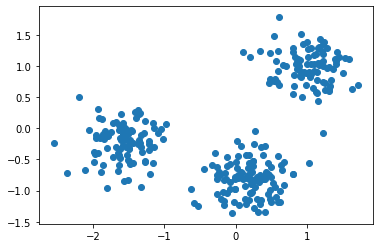

In [16]:
xs = points[:,0]
ys = points[:,1]
plt.scatter(xs,ys)

In [17]:
# some new samples to predict the cluster labels
new_points = [[  4.00233332e-01,  -1.26544471e+00],
       [  8.03230370e-01,   1.28260167e+00],
       [ -1.39507552e+00,   5.57292921e-02],
       [ -3.41192677e-01,  -1.07661994e+00],
       [  1.54781747e+00,   1.40250049e+00],
       [  2.45032018e-01,  -4.83442328e-01],
       [  1.20706886e+00,   8.88752605e-01],
       [  1.25132628e+00,   1.15555395e+00],
       [  1.81004415e+00,   9.65530731e-01],
       [ -1.66963401e+00,  -3.08103509e-01],
       [ -7.17482105e-02,  -9.37939700e-01],
       [  6.82631927e-01,   1.10258160e+00],
       [  1.09039598e+00,   1.43899529e+00],
       [ -1.67645414e+00,  -5.04557049e-01],
       [ -1.84447804e+00,   4.52539544e-02],
       [  1.24234851e+00,   1.02088661e+00],
       [ -1.86147041e+00,   6.38645811e-03],
       [ -1.46044943e+00,   1.53252383e-01],
       [  4.98981817e-01,   8.98006058e-01],
       [  9.83962244e-01,   1.04369375e+00],
       [ -1.83136742e+00,  -1.63632835e-01],
       [  1.30622617e+00,   1.07658717e+00],
       [  3.53420328e-01,  -7.51320218e-01],
       [  1.13957970e+00,   1.54503860e+00],
       [  2.93995694e-01,  -1.26135005e+00],
       [ -1.14558225e+00,  -3.78709636e-02],
       [  1.18716105e+00,   6.00240663e-01],
       [ -2.23211946e+00,   2.30475094e-01],
       [ -1.28320430e+00,  -3.93314568e-01],
       [  4.94296696e-01,  -8.83972009e-01],
       [  6.31834930e-02,  -9.11952228e-01],
       [  9.35759539e-01,   8.66820685e-01],
       [  1.58014721e+00,   1.03788392e+00],
       [  1.06304960e+00,   1.02706082e+00],
       [ -1.39732536e+00,  -5.05162249e-01],
       [ -1.09935240e-01,  -9.08113619e-01],
       [  1.17346758e+00,   9.47501092e-01],
       [  9.20084511e-01,   1.45767672e+00],
       [  5.82658956e-01,  -9.00086832e-01],
       [  9.52772328e-01,   8.99042386e-01],
       [ -1.37266956e+00,  -3.17878215e-02],
       [  2.12706760e-02,  -7.07614194e-01],
       [  3.27049052e-01,  -5.55998107e-01],
       [ -1.71590267e+00,   2.15222266e-01],
       [  5.12516209e-01,  -7.60128245e-01],
       [  1.13023469e+00,   7.22451122e-01],
       [ -1.43074310e+00,  -3.42787511e-01],
       [ -1.82724625e+00,   1.17657775e-01],
       [  1.41801350e+00,   1.11455080e+00],
       [  1.26897304e+00,   1.41925971e+00],
       [  8.04076494e-01,   1.63988557e+00],
       [  8.34567752e-01,   1.09956689e+00],
       [ -1.24714732e+00,  -2.23522320e-01],
       [ -1.29422537e+00,   8.18770024e-02],
       [ -2.27378316e-01,  -4.13331387e-01],
       [  2.18830387e-01,  -4.68183120e-01],
       [ -1.22593414e+00,   2.55599147e-01],
       [ -1.31294033e+00,  -4.28892070e-01],
       [ -1.33532382e+00,   6.52053776e-01],
       [ -3.01100233e-01,  -1.25156451e+00],
       [  2.02778356e-01,  -9.05277445e-01],
       [  1.01357784e+00,   1.12378981e+00],
       [  8.18324394e-01,   8.60841257e-01],
       [  1.26181556e+00,   1.46613744e+00],
       [  4.64867724e-01,  -7.97212459e-01],
       [  3.60908898e-01,   8.44106720e-01],
       [ -2.15098310e+00,  -3.69583937e-01],
       [  1.05005281e+00,   8.74181364e-01],
       [  1.06580074e-01,  -7.49268153e-01],
       [ -1.73945723e+00,   2.52183577e-01],
       [ -1.12017687e-01,  -6.52469788e-01],
       [  5.16618951e-01,  -6.41267582e-01],
       [  3.26621787e-01,  -8.80608015e-01],
       [  1.09017759e+00,   1.10952558e+00],
       [  3.64459576e-01,  -6.94215622e-01],
       [ -1.90779318e+00,   1.87383674e-01],
       [ -1.95601829e+00,   1.39959126e-01],
       [  3.18541701e-01,  -4.05271704e-01],
       [  7.36512699e-01,   1.76416255e+00],
       [ -1.44175162e+00,  -5.72320429e-02],
       [  3.21757168e-01,  -5.34283821e-01],
       [ -1.37317305e+00,   4.64484644e-02],
       [  6.87225910e-02,  -1.10522944e+00],
       [  9.59314218e-01,   6.52316210e-01],
       [ -1.62641919e+00,  -5.62423280e-01],
       [  1.06788305e+00,   7.29260482e-01],
       [ -1.79643547e+00,  -9.88307418e-01],
       [ -9.88628377e-02,  -6.81198092e-02],
       [ -1.05135700e-01,   1.17022143e+00],
       [  8.79964699e-01,   1.25340317e+00],
       [  9.80753407e-01,   1.15486539e+00],
       [ -8.33224966e-02,  -9.24844368e-01],
       [  8.48759673e-01,   1.09397425e+00],
       [  1.32941649e+00,   1.13734563e+00],
       [  3.23788068e-01,  -7.49732451e-01],
       [ -1.52610970e+00,  -2.49016929e-01],
       [ -1.48598116e+00,  -2.68828608e-01],
       [ -1.80479553e+00,   1.87052700e-01],
       [ -2.01907347e+00,  -4.49511651e-01],
       [  2.87202402e-01,  -6.55487415e-01],
       [  8.22295102e-01,   1.38443234e+00],
       [ -3.56997036e-02,  -8.01825807e-01],
       [ -1.66955440e+00,  -1.38258505e-01],
       [ -1.78226821e+00,   2.93353033e-01],
       [  7.25837138e-01,  -6.23374024e-01],
       [  3.88432593e-01,  -7.61283497e-01],
       [  1.49002783e+00,   7.95678671e-01],
       [  6.55423228e-04,  -7.40580702e-01],
       [ -1.34533116e+00,  -4.75629937e-01],
       [ -8.03845106e-01,  -3.09943013e-01],
       [ -2.49041295e-01,  -1.00662418e+00],
       [ -1.41095118e+00,  -7.06744127e-02],
       [ -1.75119594e+00,  -3.00491336e-01],
       [ -1.27942724e+00,   1.73774600e-01],
       [  3.35028183e-01,   6.24761151e-01],
       [  1.16819649e+00,   1.18902251e+00],
       [  7.15210457e-01,   9.26077419e-01],
       [  1.30057278e+00,   9.16349565e-01],
       [ -1.21697008e+00,   1.10039477e-01],
       [ -1.70707935e+00,  -5.99659536e-02],
       [  1.20730655e+00,   1.05480463e+00],
       [  1.86896009e-01,  -9.58047234e-01],
       [  8.03463471e-01,   3.86133140e-01],
       [ -1.73486790e+00,  -1.49831913e-01],
       [  1.31261499e+00,   1.11802982e+00],
       [  4.04993148e-01,  -5.10900347e-01],
       [ -1.93267968e+00,   2.20764694e-01],
       [  6.56004799e-01,   9.61887161e-01],
       [ -1.40588215e+00,   1.17134403e-01],
       [ -1.74306264e+00,  -7.47473959e-02],
       [  5.43745412e-01,   1.47209224e+00],
       [ -1.97331669e+00,  -2.27124493e-01],
       [  1.53901171e+00,   1.36049081e+00],
       [ -1.48323452e+00,  -4.90302063e-01],
       [  3.86748484e-01,  -1.26173400e+00],
       [  1.17015716e+00,   1.18549415e+00],
       [ -8.05381721e-02,  -3.21923627e-01],
       [ -6.82273156e-02,  -8.52825887e-01],
       [  7.13500028e-01,   1.27868520e+00],
       [ -1.85014378e+00,  -5.03490558e-01],
       [  6.36085266e-02,  -1.41257040e+00],
       [  1.52966062e+00,   9.66056572e-01],
       [  1.62165714e-01,  -1.37374843e+00],
       [ -3.23474497e-01,  -7.06620269e-01],
       [ -1.51768993e+00,   1.87658302e-01],
       [  8.88895911e-01,   7.62237161e-01],
       [  4.83164032e-01,   8.81931869e-01],
       [ -5.52997766e-02,  -7.11305016e-01],
       [ -1.57966441e+00,  -6.29220313e-01],
       [  5.51308645e-02,  -8.47206763e-01],
       [ -2.06001582e+00,   5.87697787e-02],
       [  1.11810855e+00,   1.30254175e+00],
       [  4.87016164e-01,  -9.90143937e-01],
       [ -1.65518042e+00,  -1.69386383e-01],
       [ -1.44349738e+00,   1.90299243e-01],
       [ -1.70074547e-01,  -8.26736022e-01],
       [ -1.82433979e+00,  -3.07814626e-01],
       [  1.03093485e+00,   1.26457691e+00],
       [  1.64431169e+00,   1.27773115e+00],
       [ -1.47617693e+00,   2.60783872e-02],
       [  1.00953067e+00,   1.14270181e+00],
       [ -1.45285636e+00,  -2.55216207e-01],
       [ -1.74092917e+00,  -8.34443177e-02],
       [  1.22038299e+00,   1.28699961e+00],
       [  9.16925397e-01,   7.32070275e-01],
       [ -1.60754185e-03,  -7.26375571e-01],
       [  8.93841238e-01,   8.41146643e-01],
       [  6.33791961e-01,   1.00915134e+00],
       [ -1.47927075e+00,  -6.99781936e-01],
       [  5.44799374e-02,  -1.06441970e+00],
       [ -1.51935568e+00,  -4.89276929e-01],
       [  2.89939026e-01,  -7.73145523e-01],
       [ -9.68154061e-03,  -1.13302207e+00],
       [  1.13474639e+00,   9.71541744e-01],
       [  5.36421406e-01,  -8.47906388e-01],
       [  1.14759864e+00,   6.89915205e-01],
       [  5.73291902e-01,   7.90802710e-01],
       [  2.12377397e-01,  -6.07569808e-01],
       [  5.26579548e-01,  -8.15930264e-01],
       [ -2.01831641e+00,   6.78650740e-02],
       [ -2.35512624e-01,  -1.08205132e+00],
       [  1.59274780e-01,  -6.00717261e-01],
       [  2.28120356e-01,  -1.16003549e+00],
       [ -1.53658378e+00,   8.40798808e-02],
       [  1.13954609e+00,   6.31782001e-01],
       [  1.01119255e+00,   1.04360805e+00],
       [ -1.42039867e-01,  -4.81230337e-01],
       [ -2.23120182e+00,   8.49162905e-02],
       [  1.25554811e-01,  -1.01794793e+00],
       [ -1.72493509e+00,  -6.94426177e-01],
       [ -1.60434630e+00,   4.45550868e-01],
       [  7.37153979e-01,   9.26560744e-01],
       [  6.72905271e-01,   1.13366030e+00],
       [  1.20066456e+00,   7.26273093e-01],
       [  7.58747209e-02,  -9.83378326e-01],
       [  1.28783262e+00,   1.18088601e+00],
       [  1.06521930e+00,   1.00714746e+00],
       [  1.05871698e+00,   1.12956519e+00],
       [ -1.12643410e+00,   1.66787744e-01],
       [ -1.10157218e+00,  -3.64137806e-01],
       [  2.35118217e-01,  -1.39769949e-01],
       [  1.13853795e+00,   1.01018519e+00],
       [  5.31205654e-01,  -8.81990792e-01],
       [  4.33085936e-01,  -7.64059042e-01],
       [ -4.48926156e-03,  -1.30548411e+00],
       [ -1.76348589e+00,  -4.97430739e-01],
       [  1.36485681e+00,   5.83404699e-01],
       [  5.66923900e-01,   1.51391963e+00],
       [  1.35736826e+00,   6.70915318e-01],
       [  1.07173397e+00,   6.11990884e-01],
       [  1.00106915e+00,   8.93815326e-01],
       [  1.33091007e+00,   8.79773879e-01],
       [ -1.79603740e+00,  -3.53883973e-02],
       [ -1.27222979e+00,   4.00156642e-01],
       [  8.47480603e-01,   1.17032364e+00],
       [ -1.50989129e+00,  -7.12318330e-01],
       [ -1.24953576e+00,  -5.57859730e-01],
       [ -1.27717973e+00,  -5.99350550e-01],
       [ -1.81946743e+00,   7.37057673e-01],
       [  1.19949867e+00,   1.56969386e+00],
       [ -1.25543847e+00,  -2.33892826e-01],
       [ -1.63052058e+00,   1.61455865e-01],
       [  1.10611305e+00,   7.39698224e-01],
       [  6.70193192e-01,   8.70567001e-01],
       [  3.69670156e-01,  -6.94645306e-01],
       [ -1.26362293e+00,  -6.99249285e-01],
       [ -3.66687507e-01,  -1.35310260e+00],
       [  2.44032147e-01,  -6.59470793e-01],
       [ -1.27679142e+00,  -4.85453412e-01],
       [  3.77473612e-02,  -6.99251605e-01],
       [ -2.19148539e+00,  -4.91199500e-01],
       [ -2.93277777e-01,  -5.89488212e-01],
       [ -1.65737397e+00,  -2.98337786e-01],
       [  7.36638861e-01,   5.78037057e-01],
       [  1.13709081e+00,   1.30119754e+00],
       [ -1.44146601e+00,   3.13934680e-02],
       [  5.92360708e-01,   1.22545114e+00],
       [  6.51719414e-01,   4.92674894e-01],
       [  5.94559139e-01,   8.25637315e-01],
       [ -1.87900722e+00,  -5.21899626e-01],
       [  2.15225041e-01,  -1.28269851e+00],
       [  4.99145965e-01,  -6.70268634e-01],
       [ -1.82954176e+00,  -3.39269731e-01],
       [  7.92721403e-01,   1.33785606e+00],
       [  9.54363372e-01,   9.80396626e-01],
       [ -1.35359846e+00,   1.03976340e-01],
       [  1.05595062e+00,   8.07031927e-01],
       [ -1.94311010e+00,  -1.18976964e-01],
       [ -1.39604137e+00,  -3.10095976e-01],
       [  1.28977624e+00,   1.01753365e+00],
       [ -1.59503139e+00,  -5.40574609e-01],
       [ -1.41994046e+00,  -3.81032569e-01],
       [ -2.35569801e-02,  -1.10133702e+00],
       [ -1.26038568e+00,  -6.93273886e-01],
       [  9.60215981e-01,  -8.11553694e-01],
       [  5.51803308e-01,  -1.01793176e+00],
       [  3.70185085e-01,  -1.06885468e+00],
       [  8.25529207e-01,   8.77007060e-01],
       [ -1.87032595e+00,   2.87507199e-01],
       [ -1.56260769e+00,  -1.89196712e-01],
       [ -1.26346548e+00,  -7.74725237e-01],
       [ -6.33800421e-02,  -7.59400611e-01],
       [  8.85298280e-01,   8.85620519e-01],
       [ -1.43324686e-01,  -1.16083678e+00],
       [ -1.83908725e+00,  -3.26655515e-01],
       [  2.74709229e-01,  -1.04546829e+00],
       [ -1.45703573e+00,  -2.91842036e-01],
       [ -1.59048842e+00,   1.66063031e-01],
       [  9.25549284e-01,   7.41406406e-01],
       [  1.97245469e-01,  -7.80703225e-01],
       [  2.88401697e-01,  -8.32425551e-01],
       [  7.24141618e-01,  -7.99149200e-01],
       [ -1.62658639e+00,  -1.80005543e-01],
       [  5.84481588e-01,   1.13195640e+00],
       [  1.02146732e+00,   4.59657799e-01],
       [  8.65050554e-01,   9.57714887e-01],
       [  3.98717766e-01,  -1.24273147e+00],
       [  8.62234892e-01,   1.10955561e+00],
       [ -1.35999430e+00,   2.49942654e-02],
       [ -1.19178505e+00,  -3.82946323e-02],
       [  1.29392424e+00,   1.10320509e+00],
       [  1.25679630e+00,  -7.79857582e-01],
       [  9.38040302e-02,  -5.53247258e-01],
       [ -1.73512175e+00,  -9.76271667e-02],
       [  2.23153587e-01,  -9.43474351e-01],
       [  4.01989100e-01,  -1.10963051e+00],
       [ -1.42244158e+00,   1.81914703e-01],
       [  3.92476267e-01,  -8.78426277e-01],
       [  1.25181875e+00,   6.93614996e-01],
       [  1.77481317e-02,  -7.20304235e-01],
       [ -1.87752521e+00,  -2.63870424e-01],
       [ -1.58063602e+00,  -5.50456344e-01],
       [ -1.59589493e+00,  -1.53932892e-01],
       [ -1.01829770e+00,   3.88542370e-02],
       [  1.24819659e+00,   6.60041803e-01],
       [ -1.25551377e+00,  -2.96172009e-02],
       [ -1.41864559e+00,  -3.58230179e-01],
       [  5.25758326e-01,   8.70500543e-01],
       [  5.55599988e-01,   1.18765072e+00],
       [  2.81344439e-02,  -6.99111314e-01]]

In [18]:
new_points = np.asarray(new_points)

### Predicting new samples
- Using KMeans(), create a KMeans instance called model to find 3 clusters. To specify the number of clusters, use the n_clusters keyword argument.
- Use the .fit() method of model to fit the model to the array of points points.
- Use the **.predict()** method of model to predict the cluster labels of new_points, assigning the result to labels.  

In [25]:
# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels=model.predict(new_points)

# Print cluster labels of new_points
print(labels)

[0 1 2 0 1 0 1 1 1 2 0 1 1 2 2 1 2 2 1 1 2 1 0 1 0 2 1 2 2 0 0 1 1 1 2 0 1
 1 0 1 2 0 0 2 0 1 2 2 1 1 1 1 2 2 0 0 2 2 2 0 0 1 1 1 0 1 2 1 0 2 0 0 0 1
 0 2 2 0 1 2 0 2 0 1 2 1 2 0 1 1 1 0 1 1 0 2 2 2 2 0 1 0 2 2 0 0 1 0 2 2 0
 2 2 2 1 1 1 1 2 2 1 0 1 2 1 0 2 1 2 2 1 2 1 2 0 1 0 0 1 2 0 1 0 0 2 1 1 0
 2 0 2 1 0 2 2 0 2 1 1 2 1 2 2 1 1 0 1 1 2 0 2 0 0 1 0 1 1 0 0 2 0 0 0 2 1
 1 0 2 0 2 2 1 1 1 0 1 1 1 2 2 0 1 0 0 0 2 1 1 1 1 1 1 2 2 1 2 2 2 2 1 2 2
 1 1 0 2 0 0 2 0 2 0 2 1 1 2 1 1 1 2 0 0 2 1 1 2 1 2 2 1 2 2 0 2 0 0 0 1 2
 2 2 0 1 0 2 0 2 2 1 0 0 0 2 1 1 1 0 1 2 2 1 0 0 2 0 0 2 0 1 0 2 2 2 2 1 2
 2 1 1 0]


### Visualizing the new samples
- Assign column 0 of new_points to xs, and column 1 of new_points to ys.
- Make a scatter plot of xs and ys, specifying the c=labels keyword arguments to color the points by their cluster label. Also specify alpha=0.5.
- If the default color map looks terrible, choose one from here: https://matplotlib.org/examples/color/colormaps_reference.html
- Compute the coordinates of the centroids using the .cluster_centers_ attribute of model.
- Assign column 0 of centroids to centroids_x, and column 1 of centroids to centroids_y.
- Make a scatter plot of centroids_x and centroids_y, using 'D' (a diamond) as a marker by specifying the marker parameter. Set the size of the markers to be 50 using s=50.

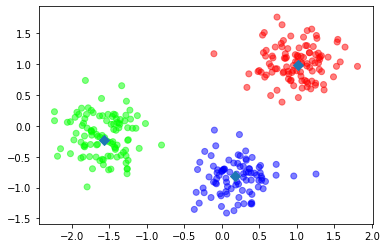

In [26]:
# Assign the columns of new_points: xs and ys
xs = new_points[:,0] #first column x axis
ys = new_points[:,1] #second column y axis


# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys, c=labels, cmap='brg', alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_ #grab centroids

# Assign the columns of centroids: centroids_x, centroids_y
#another scatter plot of the centroids
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()


## To sum up:
- Kmeans is an iterative process:
    - start from random centers
    - assign all the sample to the nearest center, then update the center
- The necessity for users to specify k, the number of clusters, in advance can be seen as a disadvantage
    - EDA may help
    - Ask the client or the domain person

K means iterative process.   
Start with random centroids, re-calculate until results are stable.  

How do we figure out K value?  
Easy cases then EDA helps.  
If not ask domain expert to help. 